## Fig 2b teleportation

In [1]:
import pickle
with open("data/Fig2b_data_pauli_tracking.pkl",'rb') as file:
    data = pickle.load(file)
data

{'0': [0.9916942007116173,
  0.9953606853691594,
  0.9934003635392049,
  0.9909159401532283,
  0.9893101609360792],
 '1': [0.9906969379555458,
  0.9965521039157955,
  0.9865915822011369,
  0.9865420280634488,
  0.9903987018552244],
 '+': [0.9888251600181921,
  0.9906789080487037,
  0.9967814368348374,
  0.9908106166002482,
  0.992280739442702],
 '+i': [0.9982766886202001,
  0.9912810382680657,
  0.987710928163756,
  0.997071150533484,
  0.9866277704951023],
 '-': [0.9867401719655291,
  0.99348602376604,
  0.9928261572161168,
  0.9922980215720643,
  0.989695832526361],
 '-i': [0.9933741416422192,
  0.9881561152717889,
  0.9866745662401967,
  0.9891139286217139,
  0.9893695201897601]}

In [2]:

states = [r'$|0\rangle$', r'$|1\rangle$',r'$|+\rangle$', r'$|-\rangle$', r'$|+i\rangle$',r'$|-i\rangle$']
telefids = {}
telefids[r'$|0\rangle$']= data['0']
telefids[r'$|1\rangle$']= data['1']
telefids[r'$|+\rangle$']= data['+']
telefids[r'$|-\rangle$']= data['-']
telefids[r'$|+i\rangle$']= data['+i']
telefids[r'$|-i\rangle$']= data['-i']



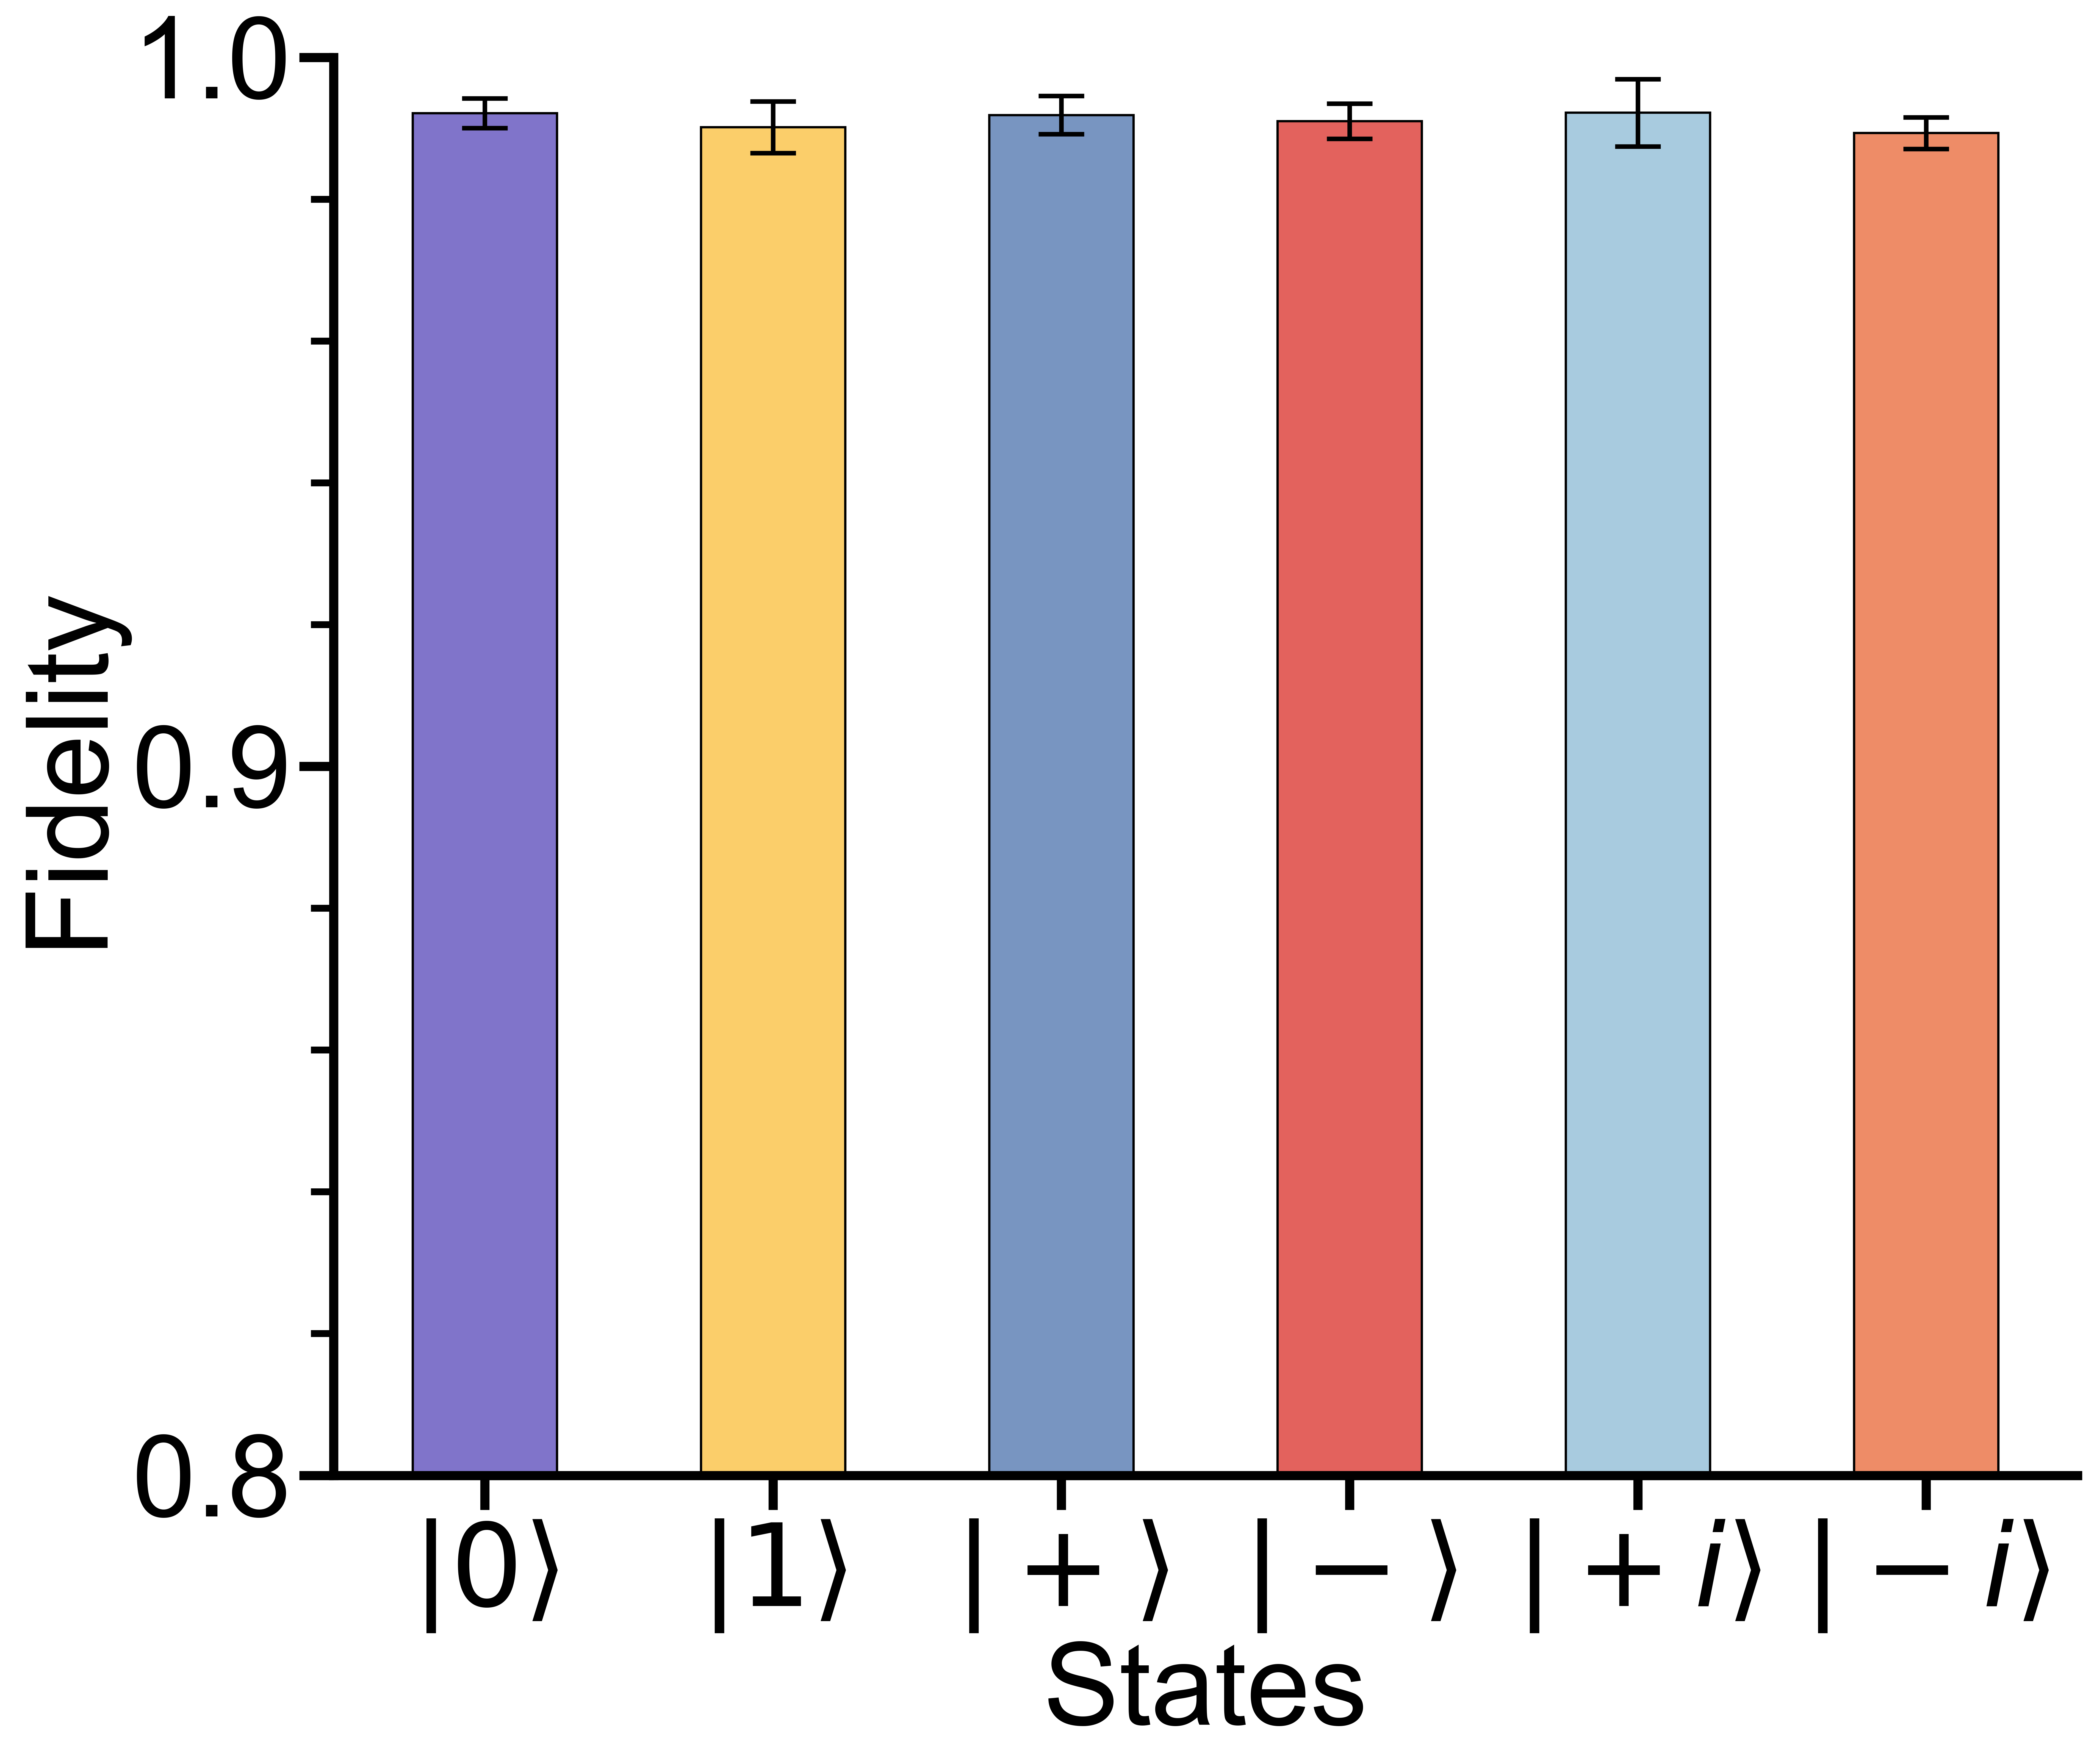

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# 示例数据

states = [r'$|0\rangle$', r'$|1\rangle$',r'$|+\rangle$', r'$|-\rangle$', r'$|+i\rangle$',r'$|-i\rangle$']
fidelities = [np.mean(telefids[key]) for key in states]
errorups = [np.std(telefids[key]) for key in states]
# errordowns = [np.mean(telefids[key])-np.min(telefids[key]) for key in states]
# 设置图形大小和字体
fontsize=50
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 30,
    'lines.linewidth': 5.0,
    'axes.linewidth': 4,
    'xtick.major.width': 4,
    'xtick.major.size': 15,
    'ytick.major.width': 4,
    'ytick.major.size': 15,
    'xtick.minor.width': 3,
    'xtick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize': (14, 12)  # 双栏尺寸：18cm → 7.2 inches
})

# 绘制柱状图
x_pos = np.arange(len(states))
plt.xlabel('States')
plt.ylabel('Fidelity')
plt.xticks(x_pos, states)
plt.yticks(np.arange(0.7,1.0,0.02), minor= True)
plt.yticks(np.arange(0.7,1.0,0.1),  minor= False)
# plt.grid(True, which='major', linestyle='--', axis='y',linewidth=1.5)
# plt.grid(True, which='minor', linestyle=':',axis='y',linewidth=1)
## hide the right and top spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.bar(x_pos, fidelities, yerr=errorups,width=0.5,edgecolor='black',linewidth=1, align='center', alpha=1, color=['#8074CA', '#FBCE6A', '#7895C1', '#E3625D', '#A8CBDF','#EE8C67'], capsize=10,error_kw={'capthick': 2,'elinewidth': 2})

# 添加标题和标签

# 设置y轴范围
plt.ylim(0.8, 1.0)

# 显示网格

# 调整布局，避免标题和标签被裁剪
plt.tight_layout()

# 保存图形为高分辨率文件
plt.savefig('figs/Fig2b_teleportation.svg', dpi=600, bbox_inches='tight')
# 显示图形
plt.show()

In [4]:
[round(f,4) for f in fidelities]

[0.9921, 0.9902, 0.9919, 0.991, 0.9922, 0.9893]

In [5]:
[round(errorups,4) for errorups in errorups]

[0.0021, 0.0037, 0.0027, 0.0025, 0.0047, 0.0022]

In [6]:
import pandas as pd
table = pd.DataFrame(columns=['state','fidelity'])
table['state'] = states
table['fidelity'] = [r'$'+str(round(fidelities[i],4))+' \pm '+str(round(errorups[i],4))+r'$' for i in range(len(states))]
table.to_latex('data/Fig2b_table.tex')

## Fig 2cde Error mitigation

In [1]:
import pickle
import pandas as pd
with open('data/2_level_tele_bb_qram_mitigation_branch_pauli_tracking.pkl', 'rb') as f:
    noise_data = pickle.load(f)
noise_data

{'1H_cor': [['0000', 0.7989611300871805, 0.7658680603955538],
  ['0001', 0.7479461381145441, 0.767828647415435],
  ['0010', 0.7498552068251966, 0.7740838913695609],
  ['0011', 0.7443760849710398, 0.7852601605401003],
  ['0100', 0.7881698330446747, 0.7691211565490689],
  ['0101', 0.7394684153099244, 0.7660391397536901],
  ['0110', 0.7212367056171135, 0.7608786707030963],
  ['0111', 0.7280441838361592, 0.7835438325330203],
  ['1000', 0.7533985052417946, 0.7659189445525226],
  ['1001', 0.731257125281937, 0.7660856432077622],
  ['1010', 0.7551005097120654, 0.7770779529414858],
  ['1011', 0.7660350048506843, 0.7814136785941515],
  ['1100', 0.8101644623476485, 0.7877731843279691],
  ['1101', 0.76152607104557, 0.7732328000278954],
  ['1110', 0.7409766403799354, 0.786527555755065],
  ['1111', 0.7665073606602838, 0.7874172623707584]],
 '1H_notcor': [['0000', 0.7401425773356382, 0.8129588064105198],
  ['0001', 0.7033048821173543, 0.8082703950122915],
  ['0010', 0.6988929853553439, 0.804718346188

In [2]:
import pickle
import qutip
print(qutip.__version__)

4.5.3


In [17]:

with open("data/2_level_AllCorrectTrue_pauli_tracking.pkl",'rb') as file:
    Correctall_data = pickle.load(file)
Correctall_data

{'MaxSuperposition_SelectFalse': [['0000',
   0.5941466075810441,
   Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
   Qobj data =
   [[ 2.13157061e-01+0.00000000e+00j  2.90801351e-03+2.08059486e-02j
      1.23759939e-01-3.19801358e-02j  6.76854178e-03+1.24120607e-02j
      1.25962078e-01+1.68224512e-02j -2.06614539e-03+1.19962825e-02j
      1.20537147e-01+2.22363094e-02j -6.09082565e-03+1.30327850e-02j]
    [ 2.90801351e-03-2.08059486e-02j  2.14429829e-02+1.89793248e-19j
     -3.92257684e-03-1.53309994e-02j  8.49169855e-03-3.26011914e-03j
      1.17840845e-04-1.00339160e-02j  4.77756624e-03+1.55436362e-03j
      1.60528592e-06-1.27047976e-02j  3.29770288e-03-3.72237996e-04j]
    [ 1.23759939e-01+3.19801358e-02j -3.92257684e-03+1.53309994e-02j
      2.60676483e-01-4.70403154e-18j  6.87506812e-03+3.13267252e-02j
      1.08252003e-01+5.68682204e-02j -7.98241267e-03+1.84401354e-02j
      1.38763595e-01+6.80825575e-02j -1.44515220e-02+1.01644928e-

In [4]:
Correctall_data.keys()

dict_keys(['MaxSuperposition_SelectFalse', 'MaxSuperposition_SelectTrue', 'GHZ_SelectFalse', 'GHZ_SelectTrue', 'single_SelectFalse', 'single_SelectTrue', '0H_SelectFalse', '0H_SelectTrue', '1H_SelectFalse', '1H_SelectTrue', 'H0_SelectFalse', 'H0_SelectTrue', 'H1_SelectFalse', 'H1_SelectTrue'])

In [5]:
noise_data.keys()

dict_keys(['1H_cor', '1H_notcor', '0H_cor', '0H_notcor'])

In [19]:
Correctall_data['single_Select'+'True']

[['00_0000', 0.814692398371656, 0.6870583559466792, 1],
 ['00_0001', 0.8010503284435543, 0.656687517155244, 1],
 ['00_0010', 0.7907738682693021, 0.677161315200991, 1],
 ['00_0011', 0.8058436465895027, 0.691791701733336, 1],
 ['00_0100', 0.793171579824182, 0.6832964908885238, 1],
 ['00_0101', 0.8084905872868046, 0.6703495980274726, 1],
 ['00_0110', 0.7820146658186345, 0.6702719572004325, 1],
 ['00_0111', 0.7963037015110896, 0.6803357081005053, 1],
 ['00_1000', 0.7744547281443581, 0.6333760457530844, 1],
 ['00_1001', 0.7877806621474617, 0.6592009773261306, 1],
 ['00_1010', 0.7836457367526092, 0.6321351472899497, 1],
 ['00_1011', 0.7855298640769415, 0.6563409055622441, 1],
 ['00_1100', 0.7668482421334639, 0.6488047525083045, 1],
 ['00_1101', 0.7776148199736875, 0.662779885843195, 1],
 ['00_1110', 0.7745078546671745, 0.6613626857365904, 1],
 ['00_1111', 0.7745513445365482, 0.6630905335184982, 1],
 ['01_0000', 0.8171128814340518, 0.6827915599063326, 1],
 ['01_0001', 0.8420287769635014, 0.69

In [20]:
Correctall_data["MaxSuperposition_SelectFalse"]

[['0000',
  0.5941466075810441,
  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[ 2.13157061e-01+0.00000000e+00j  2.90801351e-03+2.08059486e-02j
     1.23759939e-01-3.19801358e-02j  6.76854178e-03+1.24120607e-02j
     1.25962078e-01+1.68224512e-02j -2.06614539e-03+1.19962825e-02j
     1.20537147e-01+2.22363094e-02j -6.09082565e-03+1.30327850e-02j]
   [ 2.90801351e-03-2.08059486e-02j  2.14429829e-02+1.89793248e-19j
    -3.92257684e-03-1.53309994e-02j  8.49169855e-03-3.26011914e-03j
     1.17840845e-04-1.00339160e-02j  4.77756624e-03+1.55436362e-03j
     1.60528592e-06-1.27047976e-02j  3.29770288e-03-3.72237996e-04j]
   [ 1.23759939e-01+3.19801358e-02j -3.92257684e-03+1.53309994e-02j
     2.60676483e-01-4.70403154e-18j  6.87506812e-03+3.13267252e-02j
     1.08252003e-01+5.68682204e-02j -7.98241267e-03+1.84401354e-02j
     1.38763595e-01+6.80825575e-02j -1.44515220e-02+1.01644928e-02j]
   [ 6.76854178e-03-1.24120607e-02j  8.4916

In [22]:
fidelitydata = []
for select in ['True', 'False']:
    for row in Correctall_data['single_Select'+select]:
        fid_dict = {}
        address, datacell = row[0].split('_')
        fid_dict['address'] = address
        fid_dict['data'] = datacell
        fid_dict['fidelity'] = row[1]
        fid_dict['valid_portion'] = float(row[2]) if select == 'True' else 1
        if select == 'True' and float(row[2]) > 0.99:
            raise ValueError("Valid portion is 1 with selection!")
        fid_dict['select'] = select
        fidelitydata.append(fid_dict)

    for row in Correctall_data['MaxSuperposition_Select'+select]:
        fid_dict = {}
        fid_dict['address'] = '++'
        fid_dict['data'] = row[0]
        fid_dict['fidelity'] = row[1]
        fid_dict['valid_portion'] = float(row[-1])  if select == 'True' else 1
        
        fid_dict['select'] = select
        fidelitydata.append(fid_dict)
    for address in ['1H', '0H', 'H1','H0']:
        for row in Correctall_data[f'{address}_Select'+select]:
            fid_dict = {}
            fid_dict['address'] = address.replace('H', "+")
            fid_dict['data'] = row[0]
            fid_dict['valid_portion'] = float(row[-1])  if select == 'True' else 1
            fid_dict['fidelity'] = row[1]
            fid_dict['select'] = select
            fidelitydata.append(fid_dict)

# for row in noise_data['single_cor']:
#     fid_dict = {}
#     address, datacell = row[0].split('_')
#     fid_dict['address'] = address
#     fid_dict['valid_portion'] = float(row[-1])
#     fid_dict['data'] = datacell
#     fid_dict['fidelity'] = row[1]
#     fid_dict['select'] = 'responsebranch'
#     fidelitydata.append(fid_dict)

# for row in noise_data['single_notcor']:
#     fid_dict = {}
#     address, datacell = row[0].split('_')
#     fid_dict['address'] = address
#     fid_dict['valid_portion'] = float(row[-1])
#     fid_dict['data'] = datacell
#     fid_dict['fidelity'] = row[1]
#     fid_dict['select'] = 'noresponesebranch'
#     fidelitydata.append(fid_dict)

# for row in noise_data['single_cor']:
#     fid_dict = {}
#     address, datacell = row[0].split('_')
#     fid_dict['address'] = address
#     fid_dict['data'] = datacell
#     fid_dict['valid_portion'] = float(row[-1].real)
#     fid_dict['fidelity'] = row[1]
#     fid_dict['select'] = 'responsebranch'
#     fidelitydata.append(fid_dict)

Hcors = ['1H_cor', '1H_notcor', '0H_cor', '0H_notcor']
for address in ['1H', '0H']:
    for row in noise_data[f'{address}_cor']:
        fid_dict = {}
        fid_dict['address'] = address.replace('H', "+")
        fid_dict['data'] = row[0]
        fid_dict['valid_portion'] = float(row[-1])
        fid_dict['fidelity'] = row[1]
        fid_dict['select'] = 'responsebranch'
        fidelitydata.append(fid_dict)

for address in ['1H', '0H']:
    for row in noise_data[f'{address}_notcor']:
        fid_dict = {}
        fid_dict['address'] = address.replace('H', "+")
        fid_dict['data'] = row[0]
        fid_dict['valid_portion'] = float(row[-1])
        fid_dict['fidelity'] = row[1]
        fid_dict['select'] = 'noresponesebranch'
        fidelitydata.append(fid_dict)

import pandas as pd
fidelitydf = pd.DataFrame(fidelitydata)
fidelitydf

address  data  fidelity  valid_portion             select
0        00  0000  0.814692       0.687058               True
1        00  0001  0.801050       0.656688               True
2        00  0010  0.790774       0.677161               True
3        00  0011  0.805844       0.691792               True
4        00  0100  0.793172       0.683296               True
..      ...   ...       ...            ...                ...
347      0+  1011  0.738860       0.827936  noresponesebranch
348      0+  1100  0.723627       0.812800  noresponesebranch
349      0+  1101  0.729592       0.814049  noresponesebranch
350      0+  1110  0.717919       0.791543  noresponesebranch
351      0+  1111  0.717667       0.814136  noresponesebranch

[352 rows x 5 columns]

In [23]:
keymapp ={'0':0,'1':1,'+':5,'-':6}
fidelitydf.sort_values(by='address', ascending=True,key= lambda x: [2*keymapp[t[0]]+keymapp[t[1]] for t in x],inplace=True)

In [24]:
fidelitydf.address = fidelitydf.address.astype(str)

In [25]:
fidelitydf.data = fidelitydf.data.astype(str)

In [26]:
fidelitydf.to_csv("data/error_mitigation_pauli_tracking_fidelity.csv")

In [27]:
fidelitydf.groupby(['address','select'])[['fidelity','valid_portion']].agg(['mean','std']).to_csv("data/error_mitigation_pauli_tracking_fidelity_summary.csv")

In [28]:
fidelitydf.dtypes

address           object
data              object
fidelity         float64
valid_portion    float64
select            object
dtype: object

In [29]:
fidelitydf.select.unique()

array(['True', 'False', 'noresponesebranch', 'responsebranch'],
      dtype=object)

In [30]:
fidelitydf.address.unique()

array(['00', '01', '10', '11', '0+', '1+', '+0', '+1', '++'], dtype=object)

In [31]:
fidelitydf['sparse']= fidelitydf.address.apply(lambda x: x.count('+'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fontsize = 50
# Nature期刊格式设置
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 10,
    'lines.linewidth': 1.0,
    'axes.linewidth': 3,
    'xtick.major.width': 3,
    'xtick.major.size': 15,
    'ytick.major.width': 3,
    'ytick.major.size': 15,
    'xtick.minor.width': 2,
    'xtick.minor.size': 10,
    'ytick.minor.width': 2,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize':  (14*2*2300/2600, 12) # 双栏尺寸：18cm → 7.2 inches
})
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value
## 绘制小提琴图
ax1 = plt.subplot(111)
colors = ["#ADD8E6",'#E3625D','#AD4D49','#FBCE6A',]
selects = ['False', 'True']
# selects = ['False', 'noresponesebranch','responsebranch', 'True']

pos = -0.7
for s in fidelitydf['sparse'].unique():
    # grouppos += groupdis
    data = fidelitydf[(fidelitydf['sparse']== s)]
    for address in data.address.unique():
        for select in selects:
            data = fidelitydf[(fidelitydf.address == address) & (fidelitydf.select == select)]['fidelity'].values
            if len(data) == 0:
                print(address, select)
                continue
            if select == 'True':
                pos += 0.3
            else:
                pos += 0.7
            # parts = ax1.violinplot(data, positions=[pos+grouppos], showmeans=False, showextrema=False, showmedians=False,widths=0.6)
            mean = np.mean(data)
            std = np.std(data)
            color = colors[selects.index(select)]
            parts = ax1.errorbar(pos, mean, yerr=std, fmt='o', color=color,elinewidth=5,markersize=20,
                                 capsize=10,capthick=5, markerfacecolor='white', markeredgecolor=color,markeredgewidth=5)

        
        
# axes.set_xticks([1.5, 5.5+1*groupdis, 9.5+2*groupdis, 13.5+3*groupdis, 16.5+4*groupdis])

ax1.set_xticks(np.arange(0,9))
ax1.set_xlim(-0.7,9)
ax1.set_xticklabels([r'$|{}\rangle$'.format(key) for key in fidelitydf.address.unique()])
ax1.set_yticks(np.arange(0.5, 0.9, 0.02), minor=True)
# ax1.grid(which='major',axis='y',linestyle='--', alpha=0.7)
ax1.set_ylim(0.5, 0.9)
# ax1.set_xlim(-1, ticksvalues[-1]+1.5)
# axes.set_yticklabels(np.arange(0, 1.1, 0.2), minor=False)
ax1.set_ylabel('Query fidelity')
ax1.set_xlabel('Address')
plt.savefig('figs/Fig2c_mitigation.svg', bbox_inches='tight')
plt.show()



In [33]:
fidelitydf[fidelitydf['address'] == '10'].groupby('select').agg(
    {'fidelity':['mean','std']}
)

fidelity          
            mean       std
select                    
False   0.701903  0.010153
True    0.793748  0.012490

In [55]:
import numpy as np
import matplotlib.pyplot as plt
fontsize = 50
# Nature期刊格式设置
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 10,
    'lines.linewidth': 1.0,
    'axes.linewidth': 3,
    'xtick.major.width': 3,
    'xtick.major.size': 15,
    'ytick.major.width': 3,
    'ytick.major.size': 15,
    'xtick.minor.width': 2,
    'xtick.minor.size': 10,
    'ytick.minor.width': 2,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize':  (16*1221/1230, 12) # 双栏尺寸：18cm → 7.2 inches
})
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value
## 绘制小提琴图
ax1 = plt.subplot(111)
colors = ["#ADD8E6",'#5CA7C7','#8074CA','#E3625D','#AD4D49','#FBCE6A',]
selects = ['False', 'noresponesebranch','responsebranch', 'True']

pos = -1
grouppos = -1
groupdis = 2

for address in ['0+','1+']:
    pos += groupdis
    for select in selects:
        data = fidelitydf[(fidelitydf.address == address) & (fidelitydf.select == select)]['fidelity'].values
        if len(data) == 0:
            print(address, select)
            continue
        pos += 1
        mean = np.mean(data)
        std = np.std(data)
        parts = ax1.errorbar(pos+grouppos, mean, yerr=std, fmt='o', color=color,elinewidth=5,markersize=20,
                                 capsize=10,capthick=5, markerfacecolor='white', markeredgecolor=color,markeredgewidth=5)
        color = colors[selects.index(select)]
    
    
    # pos += 1
ticksvalues = []
for idx in range(2):
#     axes.vlines(4*(idx+1) +idx * groupdis, 0.45, 0.85, color='k', linestyle='-', lw=2)
    ticksvalues.append(2.5+ 4*idx +idx * groupdis)
ax1.set_xticks(ticksvalues)
# axes.set_xticks([1.5, 5.5+1*groupdis, 9.5+2*groupdis, 13.5+3*groupdis, 16.5+4*groupdis])
ax1.set_xticklabels([r"$|0+\rangle$", r"$|1+\rangle$"])

ax1.set_yticks(np.arange(0.6, 0.9, 0.02), minor=True)
# ax1.grid(which='major',axis='y',linestyle='--', alpha=0.7)
ax1.set_ylim(0.6, 0.9)
ax1.set_xlim(-0.3, ticksvalues[-1]+2.7)
# axes.set_yticklabels(np.arange(0, 1.1, 0.2), minor=False)
ax1.set_ylabel('Query fidelity')
ax1.set_xlabel('Address')
plt.savefig('figs/Fig3_mitigation.svg', bbox_inches='tight')
plt.show()



In [35]:
data0= fidelitydf[(fidelitydf['address'] == '0+')].groupby(['select'])['fidelity'].mean().to_dict()
data0

{'False': 0.6662774886302791,
 'True': 0.8062926107290165,
 'noresponesebranch': 0.7071383890843957,
 'responsebranch': 0.7795841077734389}

In [36]:
{key: data0[key]- data0['False'] for key in data0}

{'False': 0.0,
 'True': 0.14001512209873734,
 'noresponesebranch': 0.04086090045411661,
 'responsebranch': 0.11330661914315976}

In [37]:
data1= fidelitydf[(fidelitydf['address'] == '1+')].groupby(['select'])['fidelity'].mean().to_dict()
{key: data1[key]- data1['False'] for key in data1}

{'False': 0.0,
 'True': 0.1468966009087439,
 'noresponesebranch': 0.05733822185461401,
 'responsebranch': 0.10419809515749656}

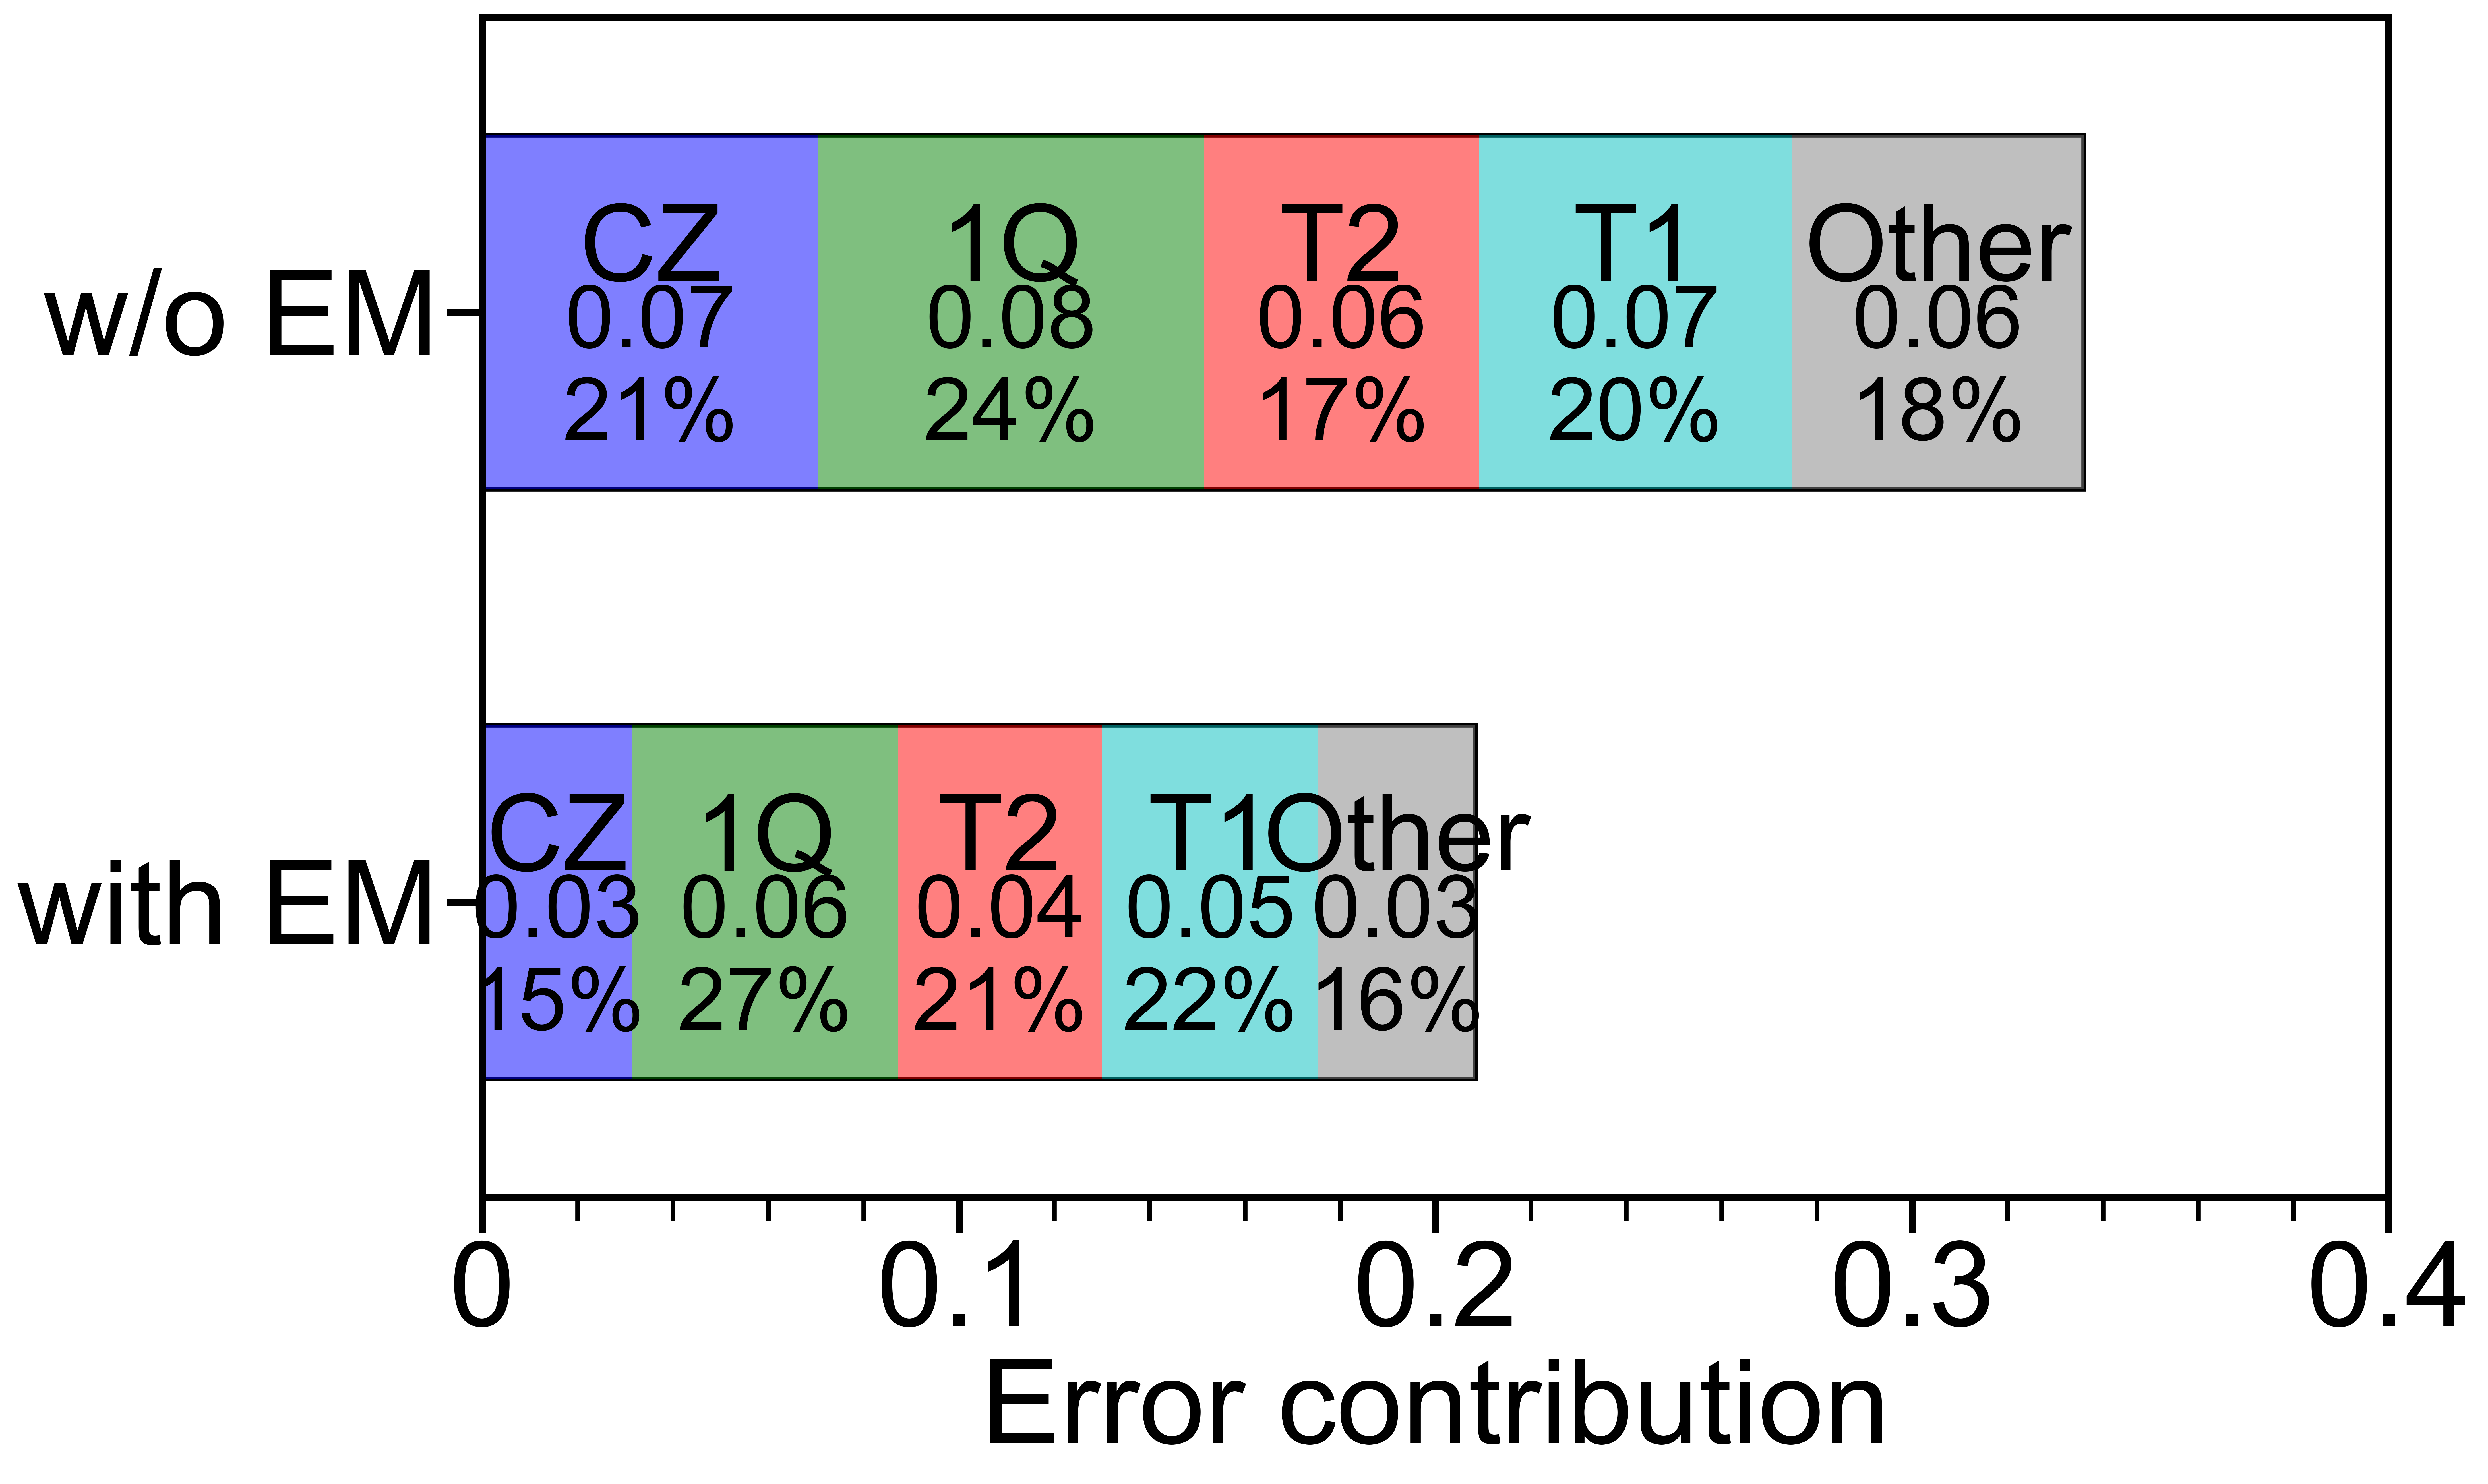

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.io
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
fontsize = 50
# Nature期刊格式设置
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 10,
    'lines.linewidth': 1.0,
    'axes.linewidth': 3,
    'xtick.major.width': 3,
    'xtick.major.size': 15,
    'ytick.major.width': 3,
    'ytick.major.size': 15,
    'xtick.minor.width': 2,
    'xtick.minor.size': 10,
    'ytick.minor.width': 2,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize':  (16*1221/1230, 10) # 双栏尺寸：18cm → 7.2 inches
})


# root_dir = 'D:/experiments/QRAM/simulation/'
root_dir = r"data/"
exp_dir = r"data/"
# exp_dir = 'D:/experiments/QRAM/exp_data/'


def process_error_budget():
    '''Using the contrib. ratio of excluded_one_error '''
    name_after_addr = "precise_error"
    
    error_budget_results_ratio = {}
    error_budget_results = {}

    for address in ['00','01','10','11','0H', '1H', 'H0', 'H1', 'HH']:
        error_budget_results_ratio[address] = {}
        error_budget_results_ratio[address]['raw'] = {}
        error_budget_results_ratio[address]['EM'] = {}

        error_budget_results[address] = {}
        error_budget_results[address]['raw'] = {}
        error_budget_results[address]['EM'] = {}

        data = scipy.io.loadmat(root_dir+f"mat_file/error_budget_{address}_{name_after_addr}.mat")

        full_error_raw = data['raw_full_error'].flatten().mean()
        no_cz_error = data['raw_no_cz_error'].flatten().mean()
        no_sq_error = data['raw_no_sq_error'].flatten().mean()
        no_T2_error = data['raw_no_T2_error'].flatten().mean()
        no_T1_error = data['raw_no_T1_error'].flatten().mean()

        _exclude_one_error_raw_sum = 4*full_error_raw - no_cz_error - no_sq_error - no_T2_error - no_T1_error

        error_budget_results_ratio[address]['raw']['cz'] = (full_error_raw - no_cz_error)/_exclude_one_error_raw_sum
        error_budget_results_ratio[address]['raw']['sq'] = (full_error_raw - no_sq_error)/_exclude_one_error_raw_sum
        error_budget_results_ratio[address]['raw']['T2'] = (full_error_raw - no_T2_error)/_exclude_one_error_raw_sum
        error_budget_results_ratio[address]['raw']['T1'] = (full_error_raw - no_T1_error)/_exclude_one_error_raw_sum

        full_error_em = data['EM_full_error'].flatten().mean()
        no_cz_error_em = data['EM_no_cz_error'].flatten().mean()
        no_sq_error_em = data['EM_no_sq_error'].flatten().mean()
        no_T2_error_em = data['EM_no_T2_error'].flatten().mean()
        no_T1_error_em = data['EM_no_T1_error'].flatten().mean()

        _exclude_one_error_em_sum = 4*full_error_em - no_cz_error_em - no_sq_error_em - no_T2_error_em - no_T1_error_em

        error_budget_results_ratio[address]['EM']['cz'] = (full_error_em - no_cz_error_em)/_exclude_one_error_em_sum
        error_budget_results_ratio[address]['EM']['sq'] = (full_error_em - no_sq_error_em)/_exclude_one_error_em_sum
        error_budget_results_ratio[address]['EM']['T2'] = (full_error_em - no_T2_error_em)/_exclude_one_error_em_sum
        error_budget_results_ratio[address]['EM']['T1'] = (full_error_em - no_T1_error_em)/_exclude_one_error_em_sum

        error_budget_results[address]['raw']['cz'] = error_budget_results_ratio[address]['raw']['cz'] * full_error_raw
        error_budget_results[address]['raw']['sq'] = error_budget_results_ratio[address]['raw']['sq'] * full_error_raw
        error_budget_results[address]['raw']['T2'] = error_budget_results_ratio[address]['raw']['T2'] * full_error_raw
        error_budget_results[address]['raw']['T1'] = error_budget_results_ratio[address]['raw']['T1'] * full_error_raw

        error_budget_results[address]['EM']['cz'] = error_budget_results_ratio[address]['EM']['cz'] * full_error_em
        error_budget_results[address]['EM']['sq'] = error_budget_results_ratio[address]['EM']['sq'] * full_error_em
        error_budget_results[address]['EM']['T2'] = error_budget_results_ratio[address]['EM']['T2'] * full_error_em
        error_budget_results[address]['EM']['T1'] = error_budget_results_ratio[address]['EM']['T1'] * full_error_em
        

    return error_budget_results

def process_exp_data():
    with open(exp_dir+"2_level_AllCorrectTrue_pauli_tracking_data_collect.pkl", "rb") as f:
        exp_data = pickle.load(f)
    addresses = ['00','01','10','11','0H', '1H', 'H0', 'H1', 'MaxSuperposition']
    exp_results = {}
    for i, address in enumerate(addresses):
        exp_error_raw = []
        exp_error_EM = []
        for k in exp_data[address].keys():
            exp_error_raw.append(1 - exp_data[address][k]['no_EM'])
            exp_error_EM.append(1 - exp_data[address][k]['EM'])
        if address == 'MaxSuperposition':
            address = 'HH'
        exp_results[address] = {}
        exp_results[address]['raw'] = np.mean(exp_error_raw)
        exp_results[address]['EM'] = np.mean(exp_error_EM)
    return exp_results

def plot_error_budget_avg_to_all_addr(error_budget_results=None, exp_results=None):
    if error_budget_results is None:
        error_budget_results = process_error_budget()
    if exp_results is None:
        exp_results = process_exp_data()
    
    # labels = ['CZ', '1Q', 'T2', 'T1', 'HEATING']
    labels = {
        'cz': "CZ", 'sq': "1Q", 'T2': "T2", 'T1': "T1"
    }

    error_sources = ['cz', 'sq', 'T2', 'T1']
    addresses = list(error_budget_results.keys())

    avg_error_budget_results = {}
    avg_error_budget_results['raw'] = {}
    avg_error_budget_results['EM'] = {}
    for error_source in error_sources:
        avg_error_budget_results['raw'][error_source] = np.mean([error_budget_results[address]['raw'][error_source] for address in error_budget_results.keys()])
        avg_error_budget_results['EM'][error_source] = np.mean([error_budget_results[address]['EM'][error_source] for address in error_budget_results.keys()])

    avg_exp_results = {}
    avg_exp_results['raw'] = np.mean([exp_results[address]['raw'] for address in exp_results.keys()])
    avg_exp_results['EM'] = np.mean([exp_results[address]['EM'] for address in exp_results.keys()])

    fig, ax = plt.subplots()

    raw_tot_values = [avg_exp_results['raw']]
    em_tot_values = [avg_exp_results['EM']]

    width = 0.6  # the width of the bars
    distance = 1
    raw_bottoms = np.zeros(1)
    em_bottoms = np.zeros(1)
    x = 0
    ax.barh(x + distance/2, raw_tot_values,  width, left=raw_bottoms, facecolor='none', edgecolor='k', lw=2, label="Raw Exp")
    ax.barh(x - distance/2, em_tot_values, width, left=em_bottoms, facecolor='none', edgecolor='k', lw=2, label="EM Exp")

    for label, color in zip(error_sources[:4], ['b','g','r','c'][:4]):
        raw_values = [avg_error_budget_results['raw'][label]]
        em_values = [avg_error_budget_results['EM'][label]]
        ax.barh(x + distance/2, raw_values,  width, left=raw_bottoms, facecolor=color, edgecolor='k', lw=0, alpha=0.5, label=f"Raw {label}")
        ax.text(raw_bottoms+raw_values[0]/2,x + distance/2+width/6,  labels[label], verticalalignment='center', horizontalalignment='center', fontsize=45)
        ratio_raw = raw_values[0] / raw_tot_values[0]
        ax.text(raw_bottoms+raw_values[0]/2,x + distance/2-width/6,  f"{raw_values[0]:.2f}\n{ratio_raw*100:.0f}%", verticalalignment='center', horizontalalignment='center', fontsize=37)
        ax.barh(x - distance/2, em_values, width, left=em_bottoms, facecolor=color, edgecolor='k', lw=0, alpha=0.5, label=f"EM {label}") 
        ax.text(em_bottoms+em_values[0]/2, x - distance/2+width/6, labels[label], verticalalignment='center', horizontalalignment='center', fontsize=45)
        ratio_em = em_values[0] / em_tot_values[0]
        if label != 'cz':
            ax.text(em_bottoms+em_values[0]/2, x - distance/2-width/6, f"{em_values[0]:.2f}\n{ratio_em*100:.0f}%", verticalalignment='center', horizontalalignment='center', fontsize=37)
        else:
            ax.text(em_bottoms+em_values[0]/2, x - distance/2-width/6, f"{em_values[0]:.2f}\n{ratio_em*100:.0f}%", verticalalignment='center', horizontalalignment='center', fontsize=37)
        raw_bottoms += np.array(raw_values)
        em_bottoms += np.array(em_values)
    
    # Plot other:
    label = "Other"
    raw_value = raw_tot_values[0] - np.sum([avg_error_budget_results['raw'][error_source] for error_source in error_sources[:4]])
    em_value = em_tot_values[0] - np.sum([avg_error_budget_results['EM'][error_source] for error_source in error_sources[:4]])
    ax.barh(x + distance/2, [raw_value],  width, left=raw_bottoms, facecolor='gray', edgecolor='k', lw=0, alpha=0.5, label=f"Raw {label}")
    ax.text(raw_bottoms+raw_value/2,x + distance/2+width/6, label, verticalalignment='center', horizontalalignment='center', fontsize=45)
    ratio_raw = raw_value / raw_tot_values[0]
    ax.text(raw_bottoms+raw_value/2,x + distance/2-width/6,  f"{raw_value:.2f}\n{ratio_raw*100:.0f}%", verticalalignment='center', horizontalalignment='center', fontsize=37)
    ax.barh(x - distance/2, [em_value], width, left=em_bottoms, facecolor='gray', edgecolor='k', lw=0, alpha=0.5, label=f"EM {label}") 
    ax.text(em_bottoms+em_value/2, x - distance/2+width/6, label, verticalalignment='center', horizontalalignment='center', fontsize=45)
    ratio_em = em_value / em_tot_values[0]
    ax.text(em_bottoms+em_value/2, x - distance/2-width/6, f"{em_value:.2f}\n{ratio_em*100:.0f}%", verticalalignment='center', horizontalalignment='center', fontsize=37)

    plt.ylim(-1*distance, distance)
    plt.xlim([0, 0.4])
    plt.yticks([x+distance/2, x-distance/2], ["w/o EM", "with EM"], )
    plt.xticks([0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4])
    plt.xticks(np.arange(0, 0.4, 0.02), minor=True)
    # plt.xlabel('Address', )
    plt.xticks()
    plt.xlabel('Error contribution', )
    plt.tight_layout()
    plt.savefig('figs/Fig2e_error_budget.svg', bbox_inches='tight')
    plt.show()

def get_fidelity_follow_components_num(print_fidelity=True):
    '''
    Using the result that only add one type of error once.
    '''
    one_comp_addr = ["00", "01", "10", "11"]
    two_comp_addr = ["0H", "1H", "H0", "H1"]
    four_comp_addr = ["HH"]
    
    one_comp_result = {error_type : [] for error_type in ["cz", "sq", "T2", "T1"]}
    two_comp_result = {error_type : [] for error_type in ["cz", "sq", "T2", "T1"]}
    four_comp_result = {error_type : [] for error_type in ["cz", "sq", "T2", "T1"]}
    for addr_list in [one_comp_addr, two_comp_addr, four_comp_addr]:
        for addr in addr_list:
            name_after_addr = "precise_error_include_one_error_add_heating"
            data = scipy.io.loadmat(root_dir+f"mat_file/error_budget_{addr}_{name_after_addr}.mat")

            no_error = data['raw_no_error'].flatten().mean()
            only_cz_error = data['raw_only_cz_error'].flatten().mean()
            only_sq_error = data['raw_only_sq_error'].flatten().mean()
            only_T2_error = data['raw_only_T2_error'].flatten().mean()
            only_T1_error = data['raw_only_T1_error'].flatten().mean()
            only_he_error = data['raw_only_he_error'].flatten().mean()  # Unused

            only_cz_fidelity = 1 - only_cz_error
            only_sq_fidelity = 1 - only_sq_error
            only_T2_fidelity = 1 - only_T2_error
            only_T1_fidelity = 1 - only_T1_error

            if addr in one_comp_addr:
                one_comp_result["cz"].append(only_cz_fidelity)
                one_comp_result["sq"].append(only_sq_fidelity)
                one_comp_result["T2"].append(only_T2_fidelity)
                one_comp_result["T1"].append(only_T1_fidelity)
            elif addr in two_comp_addr:
                two_comp_result["cz"].append(only_cz_fidelity)
                two_comp_result["sq"].append(only_sq_fidelity)
                two_comp_result["T2"].append(only_T2_fidelity)
                two_comp_result["T1"].append(only_T1_fidelity)
            elif addr in four_comp_addr:
                four_comp_result["cz"].append(only_cz_fidelity)
                four_comp_result["sq"].append(only_sq_fidelity)
                four_comp_result["T2"].append(only_T2_fidelity)
                four_comp_result["T1"].append(only_T1_fidelity)

    if print_fidelity:
        print("One component:")
        for error_type in ["cz", "sq", "T2", "T1"]:
            print(f"{error_type}: {np.mean(one_comp_result[error_type]):.3f}±{np.std(one_comp_result[error_type]):.3f}")
        print("Two component:")
        for error_type in ["cz", "sq", "T2", "T1"]:
            print(f"{error_type}: {np.mean(two_comp_result[error_type]):.3f}±{np.std(two_comp_result[error_type]):.3f}")
        print("Four component:")
        for error_type in ["cz", "sq", "T2", "T1"]:
            print(f"{error_type}: {np.mean(four_comp_result[error_type]):.3f}±{np.std(four_comp_result[error_type]):.3f}")



if __name__ == '__main__':
    plot_error_budget_avg_to_all_addr()
    

## Proportion of valid data

In [54]:
import numpy as np
import matplotlib.pyplot as plt
fontsize = 55
# Nature期刊格式设置
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 10,
    'lines.linewidth': 1.0,
    'axes.linewidth': 3,
    'xtick.major.width': 3,
    'xtick.major.size': 15,
    'ytick.major.width': 3,
    'ytick.major.size': 15,
    'xtick.minor.width': 2,
    'xtick.minor.size': 10,
    'ytick.minor.width': 2,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize':  (16*2, 12) # 双栏尺寸：18cm → 7.2 inches
})
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value
## 绘制小提琴图
ax1 = plt.axes([0.0, 0.0, 0.58, 1])
colors = ['#E3625D','#AD4D49','#FBCE6A',]
selects = ['True']
# selects = ['False', 'noresponesebranch','responsebranch', 'True']

pos = -1
grouppos = -1
groupdis = 1
for s in fidelitydf['sparse'].unique():
    # grouppos += groupdis
    data = fidelitydf[(fidelitydf['sparse']== s)]
    for address in data.address.unique():
        for select in selects:
            data = fidelitydf[(fidelitydf.address == address) & (fidelitydf.select == select)]['valid_portion'].values
            if len(data) == 0:
                print(address, select)
                continue
            pos += 1
            mean = np.mean(data)
            std = np.std(data)
            color = colors[selects.index(select)]
            parts = ax1.errorbar(pos, mean, yerr=std, fmt='o', color=color,elinewidth=5,markersize=20,
                                 capsize=10,capthick=5, markerfacecolor='white', markeredgecolor=color,markeredgewidth=5)
            # parts = ax1.violinplot(data, positions=[pos+grouppos], showmeans=False, showextrema=False, showmedians=False,widths=0.4)
            # color = colors[selects.index(select)]
            # for pc in parts['bodies']:
            #     pc.set_facecolor(color)
            #     # pc.set_edgecolor('black')
            #     pc.set_alpha(1)
            # # parts['cmeans'].set_color('black')
            # # parts['cmedians'].set_color('black')
            # quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75])
            # whiskers = np.array([
            #     adjacent_values(data, quartile1, quartile3)])
            # whiskers_min, whiskers_max = np.min(data), np.max(data)

            # inds = pos+grouppos
            # ax1.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
            # ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
            # ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
        # parts['cbars'].set_color('black')
        # parts['cmaxes'].set_color('black')
        # parts['cmins'].set_color('black')
        
        
    # pos += 1
ax1.set_xticks(np.arange(0,9))
ax1.set_xlim(-0.7,8.7)
ax1.set_xticklabels([r'$|{}\rangle$'.format(key) for key in fidelitydf.address.unique()])

ax1.grid(which='major',axis='y',linestyle='--', alpha=0.7)
# ax1.set_xlim(-1, ticksvalues[-1]+1.5)
# axes.set_yticklabels(np.arange(0, 1.1, 0.2), minor=False)
ax1.set_ylabel('Proportion of valid results')
ax1.set_ylim(0.6, 0.85)
ax1.set_yticks(np.arange(0.6, 0.85, 0.01), minor=True)
ax1.set_xlabel('Address')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1 = plt.axes([0.7, 0.0, 0.3, 1])


colors = ['#5CA7C7','#8074CA','#E3625D','#AD4D49','#FBCE6A',]
selects = ['noresponesebranch','responsebranch', 'True']

pos = -1
grouppos = -1
groupdis = 1

for address in ['0+','1+']:
    pos += groupdis
    for select in selects:
        data = fidelitydf[(fidelitydf.address == address) & (fidelitydf.select == select)]['valid_portion'].values
        if len(data) == 0:
            print(address, select)
            continue
        pos += 1
        mean = np.mean(data)
        std = np.std(data)
        color = colors[selects.index(select)]
        parts = ax1.errorbar(pos, mean, yerr=std, fmt='o', color=color,elinewidth=5,markersize=20,
                                capsize=10,capthick=5, markerfacecolor='white', markeredgecolor=color,markeredgewidth=5)
        # parts = ax1.violinplot(data, positions=[pos+grouppos], showmeans=False, showextrema=False, showmedians=False,widths=0.6)
        # color = colors[selects.index(select)]
        # for pc in parts['bodies']:
        #     pc.set_facecolor(color)
        #     # pc.set_edgecolor('black')
        #     pc.set_alpha(1)
        
        # # parts['cmeans'].set_color('black')
        # # parts['cmedians'].set_color('black')
        # quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75])
        # whiskers = np.array([
        #     adjacent_values(data, quartile1, quartile3)])
        # whiskers_min, whiskers_max = np.min(data), np.max(data)

        # inds = pos+grouppos
        # ax1.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
        # ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
        # ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
        
    # parts['cbars'].set_color('black')
    # parts['cmaxes'].set_color('black')
    # parts['cmins'].set_color('black')
    
    
    # pos += 1
ticksvalues = []
for idx in range(2):
#     axes.vlines(4*(idx+1) +idx * groupdis, 0.45, 0.85, color='k', linestyle='-', lw=2)
    ticksvalues.append(2+ 3*idx +idx * groupdis)
ax1.set_xticks(ticksvalues)
# axes.set_xticks([1.5, 5.5+1*groupdis, 9.5+2*groupdis, 13.5+3*groupdis, 16.5+4*groupdis])
ax1.set_xticklabels([r"$|0+\rangle$", r"$|1+\rangle$"], fontsize=50)
ax1.set_ylim(0.6, 0.85)
ax1.set_yticks(np.arange(0.6, 0.85, 0.01), minor=True)
ax1.grid(which='major',axis='y',linestyle='--', alpha=0.7)
ax1.set_xlim(0, ticksvalues[-1]+2)
# axes.set_yticklabels(np.arange(0, 1.1, 0.2), minor=False)
ax1.set_ylabel('Proportion of valid results')
ax1.set_xlabel('Address')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.savefig('figs/ExtendedDataFig1.svg', bbox_inches='tight')


## GHZ

In [29]:
import pickle
with open("data/2_level_AllCorrectTrue_pauli_tracking.pkl",'rb') as file:
    data = pickle.load(file)

In [30]:
data['GHZ_SelectTrue'][0][2].data.toarray()

array([[ 4.15159892e-01+0.00000000e+00j, -1.34322712e-02+5.46407638e-02j,
         4.04346691e-02-2.78840344e-02j, -6.87518737e-03-1.11635991e-02j,
        -8.99856885e-03-3.06498235e-02j, -1.87043109e-03-3.54469236e-02j,
        -6.53925439e-03+4.06731250e-02j,  3.40736537e-01+8.70665274e-02j],
       [-1.34322712e-02-5.46407638e-02j,  3.62517173e-02-8.67361738e-19j,
        -4.59115904e-03-5.36305389e-03j, -2.69197390e-03-1.40947718e-04j,
        -2.54618730e-03-2.24746456e-03j, -4.38240527e-03+3.05661429e-03j,
         2.79749335e-03-1.22833119e-02j,  1.32085203e-03-5.53492986e-02j],
       [ 4.04346691e-02+2.78840344e-02j, -4.59115904e-03+5.36305389e-03j,
         3.22250710e-02+0.00000000e+00j, -1.87322566e-04+3.20879240e-03j,
        -1.16818326e-03-3.82190371e-03j,  6.51595501e-03-1.65148998e-02j,
        -3.97685653e-03+3.13060367e-03j,  3.16676147e-02+3.10608544e-02j],
       [-6.87518737e-03+1.11635991e-02j, -2.69197390e-03+1.40947718e-04j,
        -1.87322566e-04-3.20879240e

In [31]:
data['GHZ_SelectFalse'][0][1],data['GHZ_SelectTrue'][0][1]

(0.6156142167756772, 0.7523200140841009)

In [32]:
import numpy as np

# 定义三量子比特的GHZ态
n_qubits = 3
dim = 2 ** n_qubits  # 计算希尔伯特空间维度

# 初始化态矢量，并将|000⟩和|111⟩置为1
psi = np.zeros(dim, dtype=complex)
psi[0] = 1.0
psi[-1] = 1.0
psi /= np.sqrt(2)  # 归一化

# 计算密度矩阵（外积）
rho = np.outer(psi, psi.conj())

# 验证密度矩阵是否正确（例如，迹应为1）
print("密度矩阵迹:", np.trace(rho))  # 输出 1.0

密度矩阵迹: (0.9999999999999998+0j)


In [33]:
data

{'MaxSuperposition_SelectFalse': [['0000',
   0.5941466941239905,
   Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
   Qobj data =
   [[ 2.13157103e-01+0.00000000e+00j  2.90800528e-03+2.08059635e-02j
      1.23759958e-01-3.19801310e-02j  6.76853852e-03+1.24120707e-02j
      1.25962097e-01+1.68224674e-02j -2.06615381e-03+1.19962902e-02j
      1.20537170e-01+2.22363266e-02j -6.09083551e-03+1.30327934e-02j]
    [ 2.90800528e-03-2.08059635e-02j  2.14429948e-02+8.67361738e-19j
     -3.92258373e-03-1.53310068e-02j  8.49170427e-03-3.26012052e-03j
      1.17837662e-04-1.00339245e-02j  4.77757089e-03+1.55436511e-03j
      1.60234081e-06-1.27048076e-02j  3.29770797e-03-3.72236603e-04j]
    [ 1.23759958e-01+3.19801310e-02j -3.92258373e-03+1.53310068e-02j
      2.60676529e-01+1.38777878e-17j  6.87505799e-03+3.13267438e-02j
      1.08252022e-01+5.68682338e-02j -7.98242282e-03+1.84401437e-02j
      1.38763614e-01+6.80825845e-02j -1.44515370e-02+1.01644977e-

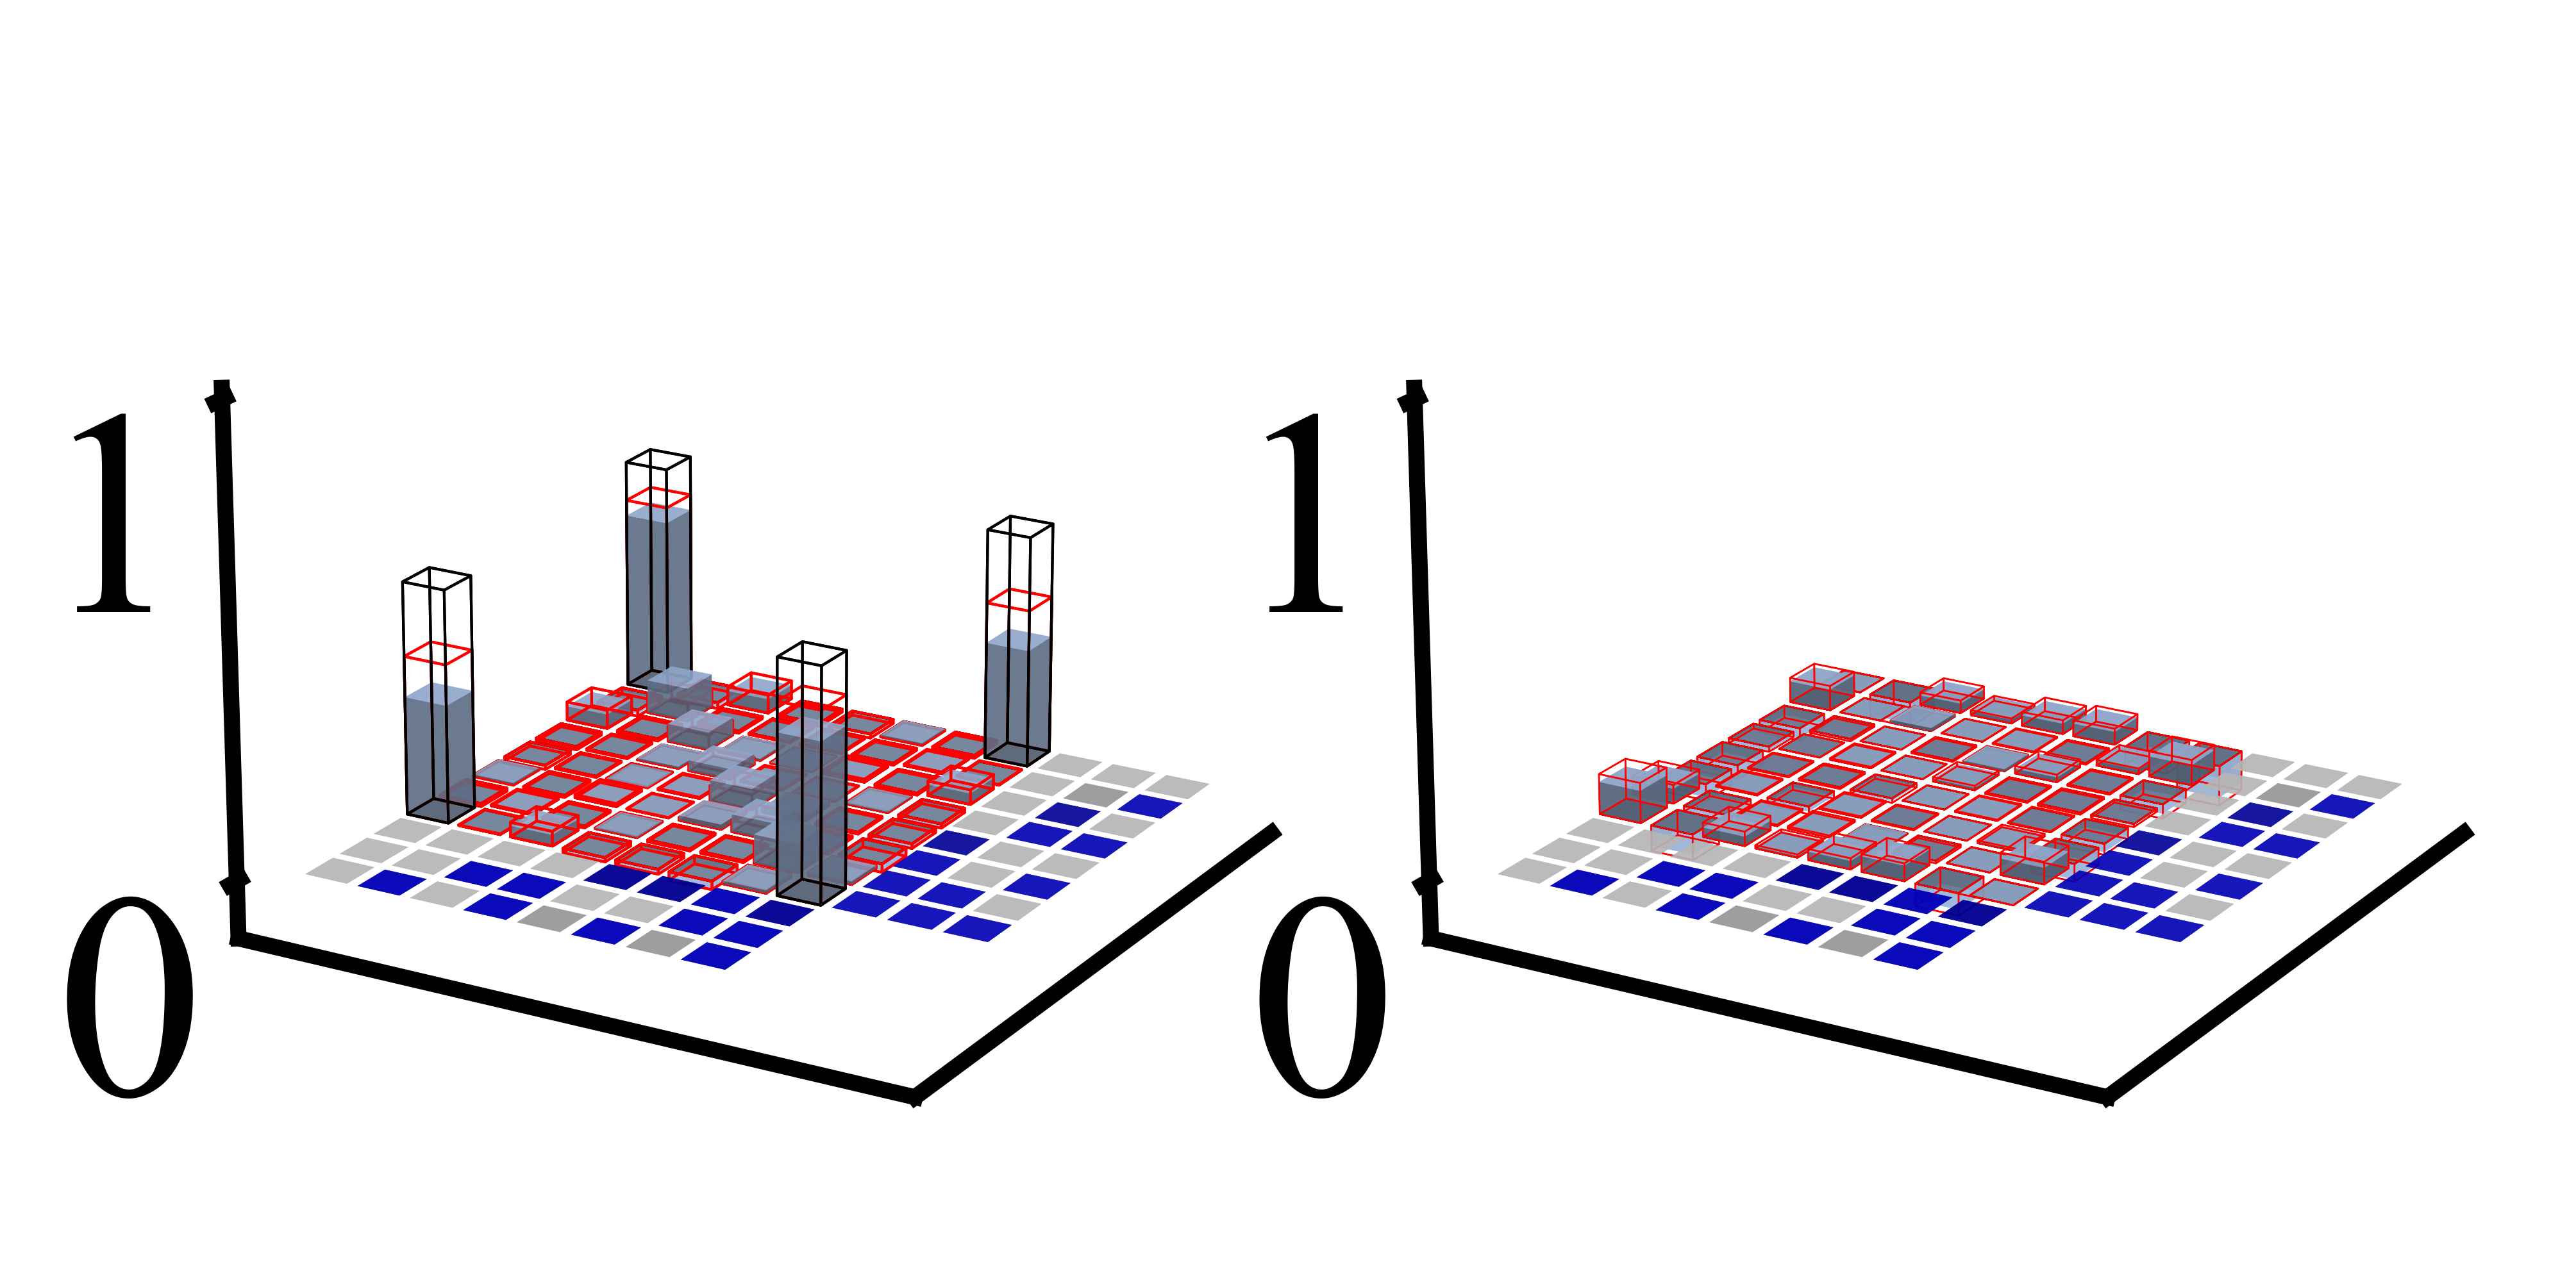

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12
# 创建三维图形
fig = plt.figure(figsize=(8, 6))  # 设置图幅大小为10x8英寸

# 生成示例密度矩阵数据
n = 8  # 矩阵大小
# 假设 density_matrix_real 和 density_matrix_imag 是8x8的矩阵

rho_select = data['GHZ_SelectTrue'][0][2].data.toarray()
rho = data['GHZ_SelectFalse'][0][2].data.toarray()
# 设置理想GHZ态的值，例如对角线上的元素
select_mod = np.abs(rho_select)    # 计算每个元素的模
select_phase = np.angle(rho_select)  # 计算每个元素的相位（弧度）
# 假设 density_matrix 是 numpy 数组形式的复数矩阵
raw_mod = np.abs(rho)    # 计算每个元素的模
raw_phase = np.angle(rho)  # 计算每个元素的相位（弧度）

# 如果希望相位以角度表示（可选）
# phase_degree = np.degrees(ideal_phase)

density_matrix = np.zeros((n, n), dtype=complex)
density_matrix[0, 0] = 0.5
density_matrix[0, 7] = 0.5
density_matrix[7, 0] = 0.5
density_matrix[7, 7] = 0.5
# 理想GHZ态的密度矩阵
ideal_mod = np.abs(density_matrix)    # 计算每个元素的模
ideal_phase = np.angle(density_matrix)  # 计算每个元素的相位（弧度）


# 创建坐标
x = y = np.arange(8)
x, y = np.meshgrid(x, y)
x, y = x.flatten(), y.flatten()
ideal_mod = density_matrix.real.flatten()
ideal_phase = density_matrix.imag.flatten()
select_mod = rho_select.real.flatten()
select_phase = rho_select.imag.flatten()
raw_mod = rho.real.flatten()
raw_phase = rho.imag.flatten()
# 创建图形
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# 定义颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, 8))  # 使用tab10颜色映射，生成8种颜色
raw_color = '#B5D2FE'
# 绘制实部
# 按Y轴从大到小的顺序绘制，确保Y轴较小的值覆盖较大的值
for j in range(7, -1, -1):  # 从Y轴最大值到最小值
    for i in range(8):
        # 绘制实体框
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, raw_mod[i*8+j], color=raw_color, alpha=0.7)
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, ideal_mod[i*8+j], color=raw_color, edgecolor='k', alpha=0,linewidth=0.5)
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, select_mod[i*8+j], color=raw_color, edgecolor='r', alpha=0,linewidth=0.5)

# 绘制位图
bitmap = np.zeros((3, 8))
n = np.arange(8)
m = np.arange(3)
for i in range(8):
    for j in range(3):
        bitmap[j, i] = int(bin(i)[2:].zfill(3)[j])
x_m, y_n = np.meshgrid(m, n)
x_m, y_n = x_m.flatten(), y_n.flatten()
bits_colors = ['b','b','b']
## draw the bitmaps for 0000 to 1111 with 4 rows and 16 columns

# 按Y轴从大到小的顺序绘制，确保Y轴较小的值覆盖较大的值
for j in range(7, -1, -1):  # 从Y轴最大值到最小值
    for i in range(8):
        # 绘制实体框
        ax2.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, raw_phase[i*8+j], color=raw_color, alpha=0.8)
        ax2.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, ideal_phase[i*8+j], color=colors[0], edgecolor='k', alpha=0,linewidth=0.3)
        ax2.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, select_phase[i*8+j], color=colors[0], edgecolor='r', alpha=0,linewidth=0.3)


# 仅保留 z 轴刻度，隐藏 x-z 和 y-z 平面的网格
# 通过调整平面的可见性

# 设置标签
for ax in [ax1, ax2]:
    for j in range(3):  # 从Y轴最大值到最小值
        for i in range(8):
            # 绘制实体框
            if bitmap[j, i]:
                ax.bar3d(x_m[i*3+j]+0.4+8, y_n[i*3+j]+0.4, 0, 0.8, 0.8,0, color=bits_colors[j], alpha=0.8)
                ax.annotate('1', (x_m[i*3+j]+0.4+8, y_n[i*3+j]+0.4), color=bits_colors[j], ha='center', va='center')
            else:
                ax.bar3d(x_m[i*3+j]+0.4+8, y_n[i*3+j]+0.4, 0, 0.8, 0.8,0, color='w', alpha=0.7)

# 保留 z 轴刻度，但关闭 x-y 平面的网格
            
            if bitmap[j, i]:
                ax.bar3d(y_n[i*3+j]+0.4, x_m[i*3+j]+0.4+8, 0, 0.8, 0.8,0, color=bits_colors[j], alpha=0.7)
            else:
                ax.bar3d(y_n[i*3+j]+0.4, x_m[i*3+j]+0.4+8, 0, 0.8, 0.8,0, color='w', alpha=0.7)

    # 保留 z 轴刻度，但关闭 x-y 平面的网格
    ax.grid(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # x-z 平面透明
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # y-z 平面透明
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # x-y 平面透明（可选）

    # 只显示 z 轴的刻度线
    ax.set_xticks([])  # 可选：隐藏 x 轴刻度
    ax.set_yticks([])  # 可选：隐藏 y 轴刻度
    
    # ax.xaxis.line.set_visible(False)  # 隐藏默认轴线
    # ax.yaxis.line.set_visible(False)
    # ax.zaxis.line.set_visible(False)
    # ax.set_xticks(np.arange(8) )
    # ax.set_yticks(np.arange(8) )
    # ax.set_xticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
    # ax.set_yticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
    # ax.zaxis.set_rotate_label(False)
    # ax1.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=1)  # z 轴线
    # z_ticks = [ 0, 0.5, 1]  # z 轴刻度位置
    # for z in z_ticks:
    #     ax1.text(0, -0.1, z, f'{z}', ha='center', va='center')  # 在 z 轴左侧添加刻度标签
    ax.set_zlim(-0.1, 1)  # 设置Z轴范围
    # ax.zaxis.set_ticks_position('lower')
    ax.view_init(elev=20, azim=30)  # 设置视角
# ax1.set_title('real part')
# ax1.set_zticks([0, 0.5, 1])  # 设置 z 轴刻度（根据需要调整）
# ax1.set_zlim(-0.1, 1)  # 设置Z轴范围
# ax2.set_zlim(-np.pi, np.pi)  # 设置Z轴范围
# ax2.set_zticks(np.array([-1,-0.5,0, 0.5, 1])*np.pi)  # 设置 z 轴刻度（根据需要调整）
# ax2.set_title('imaginary part')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/Fig2d_noiseGHZstate.svg', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

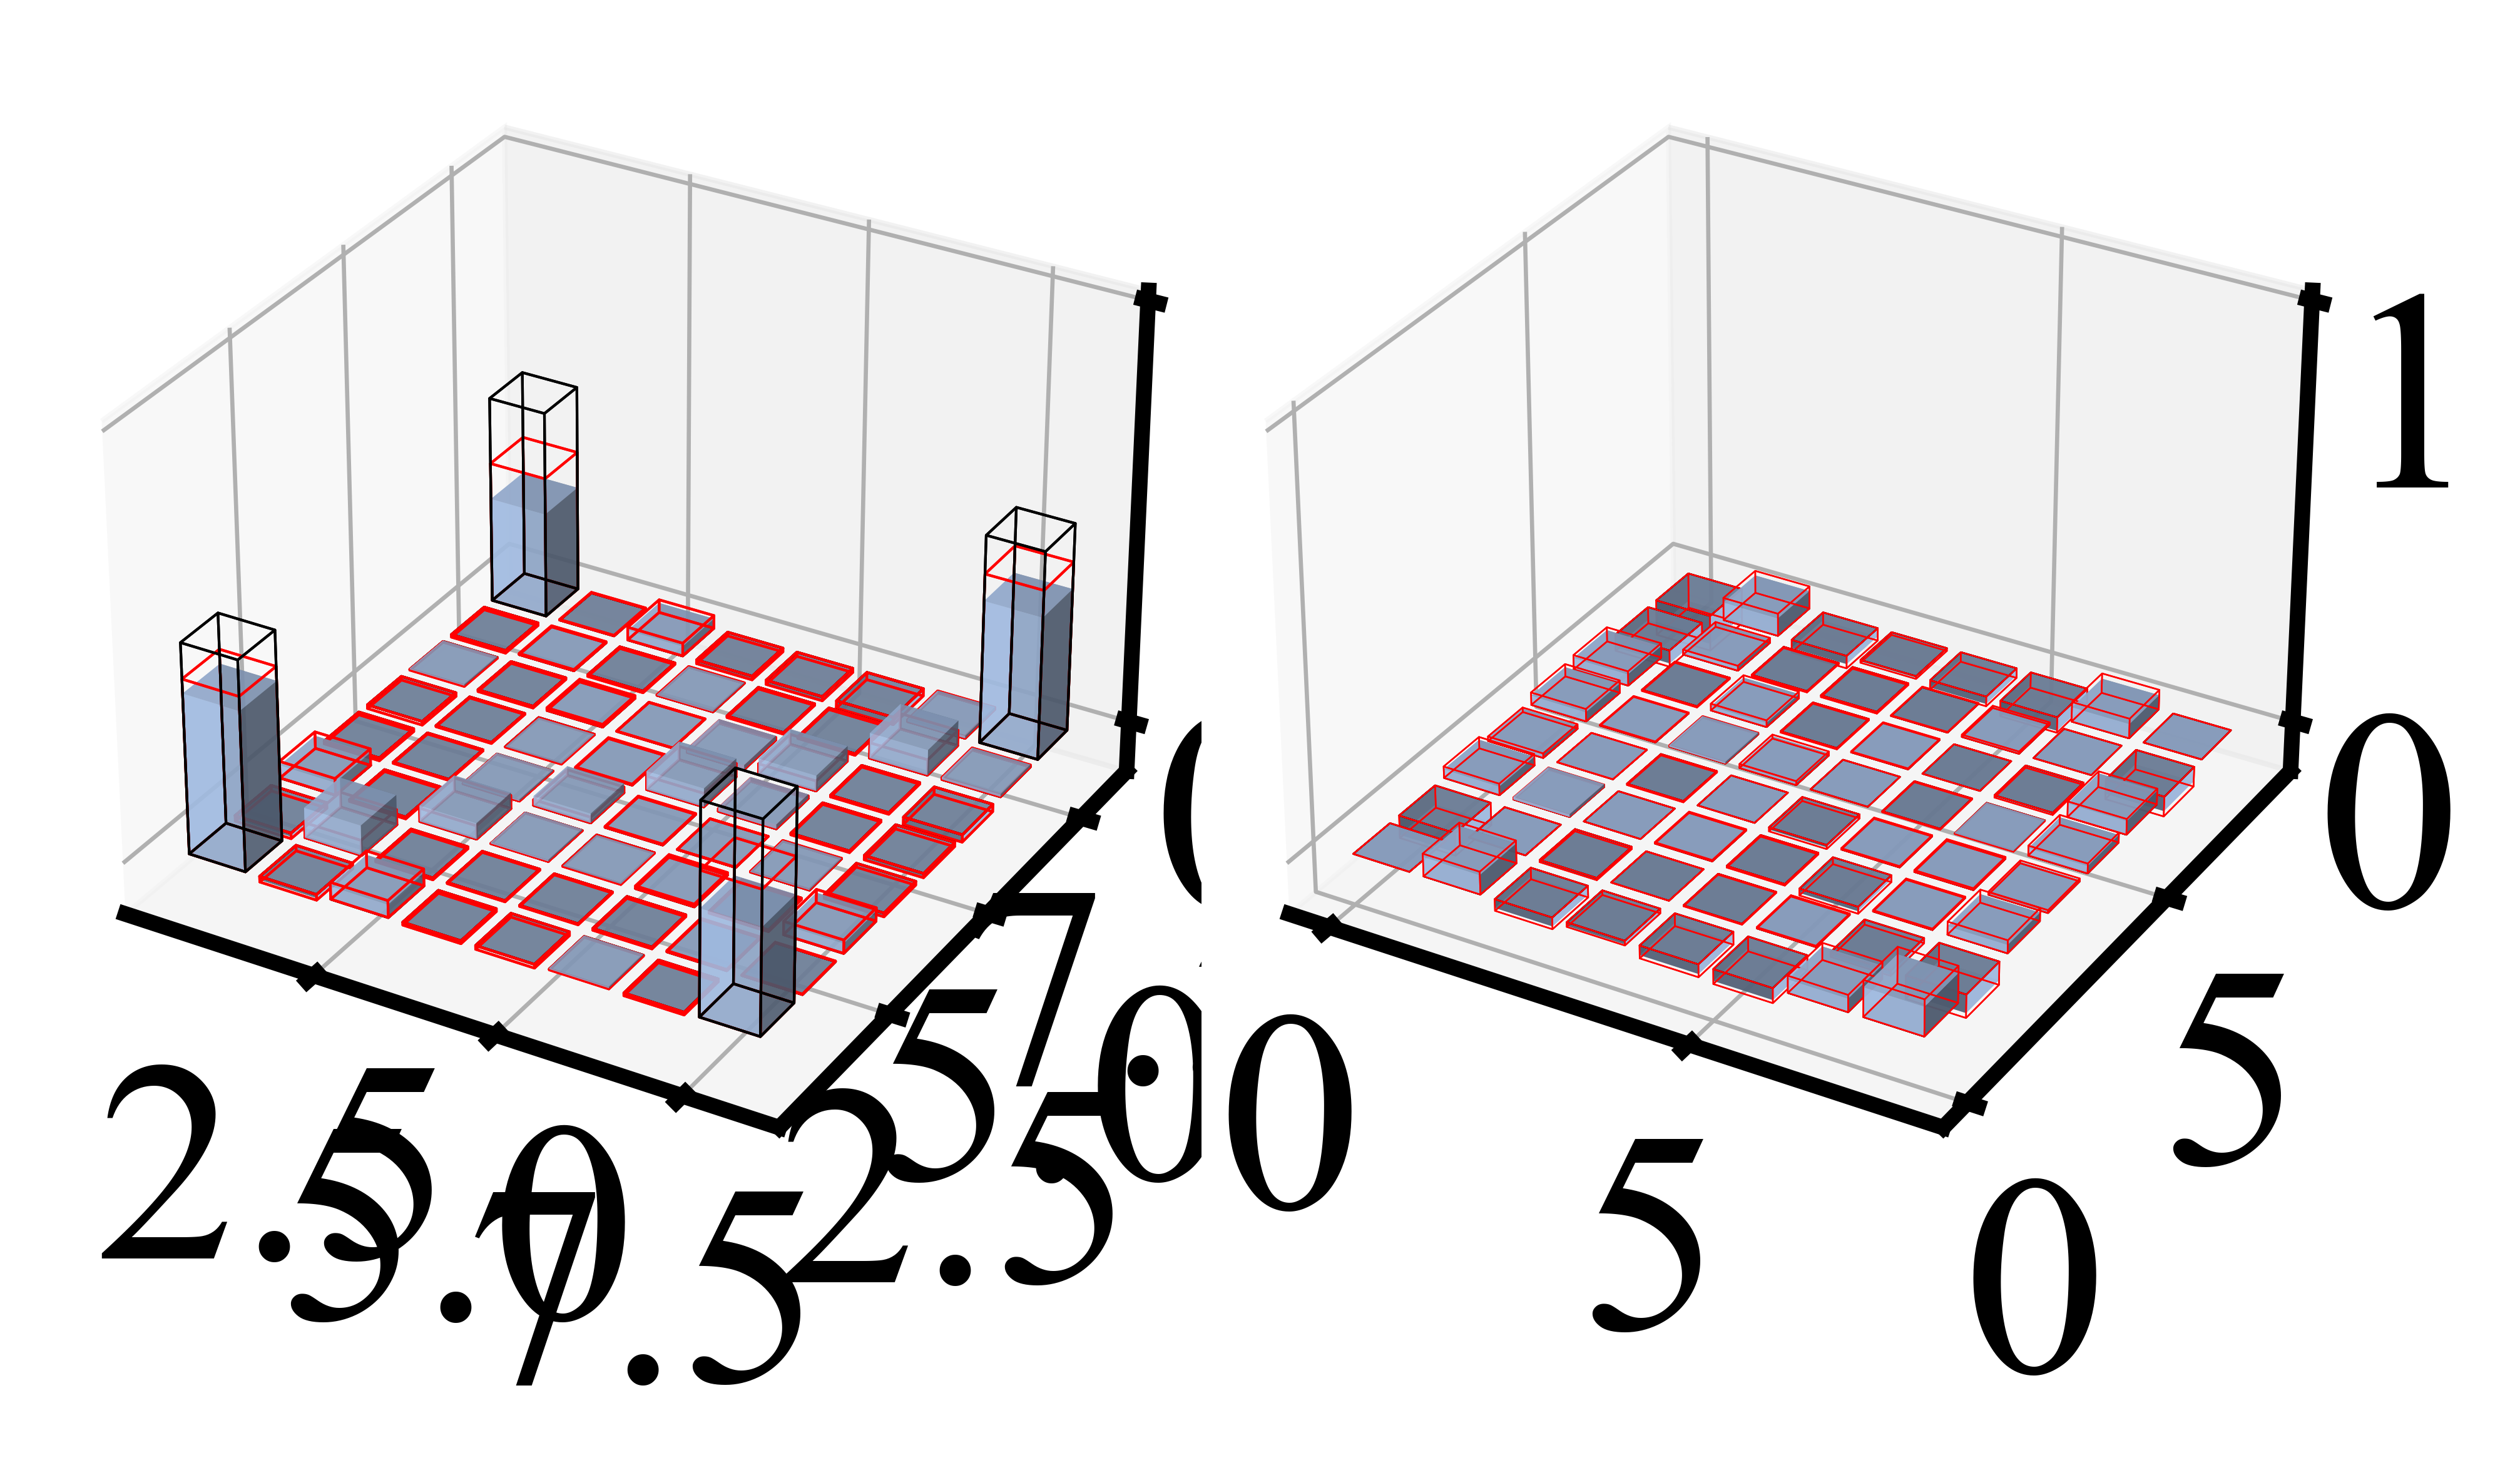

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12
# 创建三维图形
fig = plt.figure(figsize=(8, 6))  # 设置图幅大小为10x8英寸

# 生成示例密度矩阵数据
n = 8  # 矩阵大小
# 假设 density_matrix_real 和 density_matrix_imag 是8x8的矩阵

rho_select = data['GHZ_SelectTrue'][0][2].data.toarray()
rho = data['GHZ_SelectFalse'][0][2].data.toarray()
# 设置理想GHZ态的值，例如对角线上的元素
select_mod = np.abs(rho_select)    # 计算每个元素的模
select_phase = np.angle(rho_select)  # 计算每个元素的相位（弧度）
# 假设 density_matrix 是 numpy 数组形式的复数矩阵
raw_mod = np.abs(rho)    # 计算每个元素的模
raw_phase = np.angle(rho)  # 计算每个元素的相位（弧度）

# 如果希望相位以角度表示（可选）
# phase_degree = np.degrees(ideal_phase)

density_matrix = np.zeros((n, n), dtype=complex)
density_matrix[0, 0] = 0.5
density_matrix[0, 7] = 0.5
density_matrix[7, 0] = 0.5
density_matrix[7, 7] = 0.5
# 理想GHZ态的密度矩阵
ideal_mod = np.abs(density_matrix)    # 计算每个元素的模
ideal_phase = np.angle(density_matrix)  # 计算每个元素的相位（弧度）


# 创建坐标
x = y = np.arange(8)
x, y = np.meshgrid(x, y)
x, y = x.flatten(), y.flatten()
ideal_mod = density_matrix.real.flatten()
ideal_phase = density_matrix.imag.flatten()
select_mod = rho_select.real.flatten()
select_phase = rho_select.imag.flatten()
raw_mod = rho.real.flatten()
raw_phase = rho.imag.flatten()
# 创建图形
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# 定义颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, 8))  # 使用tab10颜色映射，生成8种颜色
raw_color = '#B5D2FE'
# 绘制实部
# 按Y轴从大到小的顺序绘制，确保Y轴较小的值覆盖较大的值
for j in range(7, -1, -1):  # 从Y轴最大值到最小值
    for i in range(8):
        # 绘制实体框
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, raw_mod[i*8+j], color=raw_color, alpha=0.7)
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, ideal_mod[i*8+j], color=raw_color, edgecolor='k', alpha=0,linewidth=0.5)
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, select_mod[i*8+j], color=raw_color, edgecolor='r', alpha=0,linewidth=0.5)

# 绘制位图
bitmap = np.zeros((3, 8))
n = np.arange(8)
m = np.arange(3)
for i in range(8):
    for j in range(3):
        bitmap[j, i] = int(bin(i)[2:].zfill(3)[j])
x_m, y_n = np.meshgrid(m, n)
x_m, y_n = x_m.flatten(), y_n.flatten()
bits_colors = ['b','b','b']
## draw the bitmaps for 0000 to 1111 with 4 rows and 16 columns

# 按Y轴从大到小的顺序绘制，确保Y轴较小的值覆盖较大的值
for j in range(7, -1, -1):  # 从Y轴最大值到最小值
    for i in range(8):
        # 绘制实体框
        ax2.bar3d(x[i*8+j], y[i*8+j], 0, 0.8, 0.8, raw_phase[i*8+j], color=raw_color, alpha=0.8)
        ax2.bar3d(x[i*8+j], y[i*8+j], 0, 0.8, 0.8, ideal_phase[i*8+j], color=colors[0], edgecolor='k', alpha=0,linewidth=0.3)
        ax2.bar3d(x[i*8+j], y[i*8+j], 0, 0.8, 0.8, select_phase[i*8+j], color=colors[0], edgecolor='r', alpha=0,linewidth=0.3)



    # 保留 z 轴刻度，但关闭 x-y 平面的网格
    ax.grid(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # x-z 平面透明
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # y-z 平面透明
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # x-y 平面透明（可选）

    # 只显示 z 轴的刻度线
    ax.set_xticks([])  # 可选：隐藏 x 轴刻度
    ax.set_yticks([])  # 可选：隐藏 y 轴刻度
    
    # ax.xaxis.line.set_visible(False)  # 隐藏默认轴线
    # ax.yaxis.line.set_visible(False)
    # ax.zaxis.line.set_visible(False)
    # ax.set_xticks(np.arange(8) )
    # ax.set_yticks(np.arange(8) )
    # ax.set_xticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
    # ax.set_yticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
    # ax.zaxis.set_rotate_label(False)
    # ax1.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=1)  # z 轴线
    # z_ticks = [ 0, 0.5, 1]  # z 轴刻度位置
    # for z in z_ticks:
    #     ax1.text(0, -0.1, z, f'{z}', ha='center', va='center')  # 在 z 轴左侧添加刻度标签
    ax.set_zlim(-0.1, 1)  # 设置Z轴范围
    # ax.zaxis.set_ticks_position('lower')
    ax.view_init(elev=20, azim=30)  # 设置视角
# ax1.set_title('real part')
# ax1.set_zticks([0, 0.5, 1])  # 设置 z 轴刻度（根据需要调整）
ax1.set_zlim(-0.1, 1)  # 设置Z轴范围
ax2.set_zlim(-0.1, 1)  # 设置Z轴范围
# ax2.set_zticks(np.array([-1,-0.5,0, 0.5, 1])*np.pi)  # 设置 z 轴刻度（根据需要调整）
# ax2.set_title('imaginary part')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/Fig2d_noiseGHZstate.svg', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()